<img src="interview_q_0828_1.jpg" alt="Drawing" style="width: 600px;"/>
<img src="interview_q_0828_2.jpg" alt="Drawing" style="width: 600px;"/>
<img src="interview_q_0828_3.jpg" alt="Drawing" style="width: 600px;"/>
<img src="interview_q_0828_4.jpg" alt="Drawing" style="width: 600px;"/>

In [1]:
import numpy as np
# define rectangle func (return 4 points)
def rectangle_point(K, L, M, N):
    '''return 4 points which forms a rectangle
    also check if K<M and L<N'''
    km = sorted([K,M])
    ln = sorted([L,N])
    return np.array([[km[0],ln[1]], [km[0],ln[0]], [km[1],ln[0]], [km[1],ln[1]]], dtype = int)
    #array([[K,N],[K,L],[M,L],[M,N]])


In [2]:
# define rectangle area computation
def rectangle_area(array):
    width = array[0][1] - array[1][1]
    height = array[2][0] - array[1][0]
    return width * height

In [3]:
rectangle_point(3, 4, 1, 2)

array([[1, 4],
       [1, 2],
       [3, 2],
       [3, 4]])

In [4]:
rectangle_area(rectangle_point(3, 4, 1, 2))

4

In [5]:
# define duplicate area checking function
def reverse_area(K,L,M,N,P,Q,R,S):
    rectangle1 = rectangle_point(K, L, M, N)
    rectangle2 = rectangle_point(P, Q, R, S)
    if K in range(P,R+1) and N in range(Q,S+1):
        if M in range(P,R+1) and L in range(Q,S+1):
            reverse_area = -rectangle_area(rectangle1)
        elif M in range(P, R+1) and L < Q:
            reverse_area = -((M-K)*(N-Q))
        elif M > R and L in range(Q,S+1):
            reverse_area = -((R-K)*(N-L))
        else:
            reverse_area = -((R-K)*(N-Q))
    elif P in range(K,M+1) and S in range(L,N+1):
        if R in range(K,M+1) and Q in range(L,N+1):
            reverse_area = -rectangle_area(rectangle2)
        elif R in range(K, M+1) and Q < L:
            reverse_area = -((R-P)*(S-L))
        elif R > M and Q in range(L,N+1):
            reverse_area = -((M-P)*(S-Q))
        else:
            reverse_area = -((M-P)*(S-L))
    elif M in range(P,R+1) and L in range(Q,S+1):
        if K in range(P,R+1) and N in range(Q,S+1):
            reverse_area = -rectangle_area(rectangle1)
        elif K in range(P, R+1) and N > S:
            reverse_area = -((M-K)*(S-L))
        elif K < P and L in range(Q,S+1):
            reverse_area = -((M-P)*(N-L))
        else:
            reverse_area = -((M-P)*(S-L))
    elif R in range(K,M+1) and Q in range(L,N+1):
        if P in range(K,M+1) and S in range(L,N+1):
            reverse_area = -rectangle_area(rectangle2)
        elif P in range(K, M+1) and S > N:
            reverse_area = -((R-P)*(N-Q))
        elif P < K and S in range(L,N+1):
            reverse_area = -((R-K)*(S-Q))
        else:
            reverse_area = -((R-K)*(N-Q))
    else:
        reverse_area = 0
    return reverse_area

In [6]:
#def solution
def solution(K,L,M,N,P,Q,R,S):
    '''K to S should be all intergers
    within the range [-2,147,483,648, 2,147,483,648] or return -1
    and K<M, L<N, P<R, Q<S'''
    # set return method first
    checkbox = [K,L,M,N,P,Q,R,S]
    for i in checkbox:
        if i > 2147483648 or i < -2147483648 or i - int(i) != 0:
            return -1
    if K>=M or L>=N or P>=R or Q>=S: return -1
    rectangle1 = rectangle_point(K, L, M, N)
    rectangle2 = rectangle_point(P, Q, R, S)
    # if the upper left point of any rectangle locate in the area of the other
    # then the duplicate area should be computed only once
    neg_area = reverse_area(K,L,M,N,P,Q,R,S)
    return -1 if (rectangle_area(rectangle1) + rectangle_area(rectangle2) 
                  + neg_area) > 2147748648 else (rectangle_area(rectangle1) + rectangle_area(rectangle2) 
                  + neg_area)
    

In [7]:
solution(100, 200, 500, 800, 10, 300, 350, 1000)

353000

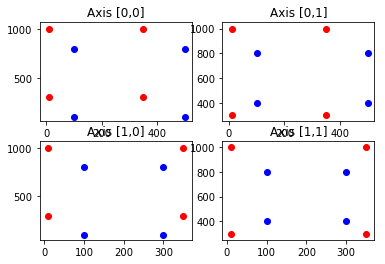

In [20]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(2, 2)
axarr[0, 0].scatter(x = rectangle_point(100, 100, 500, 800)[:,0], 
                    y = rectangle_point(100, 100, 500, 800)[:,1], color = 'b')
axarr[0, 0].scatter(x = rectangle_point(10, 300, 350, 1000)[:,0], 
                    y = rectangle_point(10, 300, 350, 1000)[:,1], color = 'r')
axarr[0, 0].set_title('Axis [0,0]')
axarr[0, 1].scatter(x = rectangle_point(100, 400, 500, 800)[:,0], 
                    y = rectangle_point(100, 400, 500, 800)[:,1], color = 'b')
axarr[0, 1].scatter(x = rectangle_point(10, 300, 350, 1000)[:,0], 
                    y = rectangle_point(10, 300, 350, 1000)[:,1], color = 'r')
axarr[0, 1].set_title('Axis [0,1]')
axarr[1, 0].scatter(x = rectangle_point(100, 100, 300, 800)[:,0], 
                    y = rectangle_point(100, 100, 300, 800)[:,1], color = 'b')
axarr[1, 0].scatter(x = rectangle_point(10, 300, 350, 1000)[:,0], 
                    y = rectangle_point(10, 300, 350, 1000)[:,1], color = 'r')
axarr[1, 0].set_title('Axis [1,0]')
axarr[1, 1].scatter(x = rectangle_point(100, 400, 300, 800)[:,0], 
                    y = rectangle_point(100, 400, 300, 800)[:,1], color = 'b')
axarr[1, 1].scatter(x = rectangle_point(10, 300, 350, 1000)[:,0], 
                    y = rectangle_point(10, 300, 350, 1000)[:,1], color = 'r')
axarr[1, 1].set_title('Axis [1,1]')
plt.show()

In [22]:
# Question2
import random
random.seed(100)

In [64]:
from collections import defaultdict
A = defaultdict(int)
for i in range(random.randint(1, 40000)):
    A[i] = random.randint(-2147483648, 2147483648)

defaultdict(int,
            {0: 10,
             1: 9,
             2: -7,
             3: -5,
             4: 4,
             5: 10,
             6: 10,
             7: 9,
             8: 3,
             9: 0,
             10: 8})

In [69]:
def solution(K, A):
    KminusA = defaultdict(list)
    A_match = defaultdict(list)
    match_list = []
    for num, value in A.items():
        # A is a dict {1: 100, 2: -890, 3: 100, 4: 0, ......}
        # Assume K = 100
        KminusA[K - value].append(num) 
        # KminusA: {0: [1, 3], -990: [2], 100: [4], ......}
    print(KminusA)
    for num, value in A.items():
        if value in KminusA.keys():
            # if value in KminusA.keys() => K - A[num1] - A[num2] = 0
            A_match[num] = KminusA[value]
            # A_match: {1: [4], 2: [], 3: [4], 4: [1, 3], ......}
    print(A_match)
    for key, values in A_match.items():
        for item in values:
            match_list.append((key, item))
    return len(match_list)

In [70]:
solution(1, A)

defaultdict(<class 'list'>, {8: [2], 1: [9], 6: [3], -9: [0, 5, 6], -8: [1, 7], -7: [10], -3: [4], -2: [8]})
defaultdict(<class 'list'>, {2: [10], 10: [2]})


2